In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [150]:
# Set API URL, parameters, and headers
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
    'start': '1',
    'limit': '15',
    'convert': 'USD'
}
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '31719065-bea7-4767-8542-be1a4ee7be59',
}

# Create a session and update headers
session = Session()
session.headers.update(headers)

# Function to make API request and store data in DataFrame
def api_run():
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return None

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    return df2

In [151]:
# Make multiple API requests and append data to DataFrame
for i in range(30):
    df2 = api_run()
    if df2 is not None:
        df = df.append(df2)
    print("API runner completed")
    sleep(60)  # Sleep for 60 seconds to avoid rate limiting

# Save the DataFrame to a CSV file
df.to_csv('crypto_data.csv', index=False)


API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed


In [32]:
df = pd.read_csv("crypto_data.csv")

In [112]:
#PRICE FORMATTER FUNCTIONS
# Price formatter function
def price_formatter_volume_trend(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.2f}B'
    elif x >= 1e6:
        return f'{x/1e6:.2f}M'
    elif x >= 1e3:
        return f'{x/1e3:.2f}K'
    else:
        return f'{x:.2f}'

    
def price_formatter_btc(x, pos):
    return '${:.2f}'.format(x)

def price_formatter_table(x): return '${:.2f}'.format(x)

In [33]:
# Set display options to improve DataFrame formatting
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows 

dff = df[['name', 'quote.USD.price', 'quote.USD.percent_change_1h', 'timestamp']]
print(df)

       id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             10379   
1    1027      Ethereum    ETH      ethereum              7199   
2     825   Tether USDt   USDT        tether             58077   
3    1839           BNB    BNB           bnb              1548   
4      52           XRP    XRP           xrp              1015   
5    3408      USD Coin   USDC      usd-coin             13483   
6      74      Dogecoin   DOGE      dogecoin               759   
7    2010       Cardano    ADA       cardano               885   
8    5426        Solana    SOL        solana               495   
9    1958          TRON    TRX          tron               800   
10      2      Litecoin    LTC      litecoin               962   
11   3890       Polygon  MATIC       polygon               791   
12   6636      Polkadot    DOT  polkadot-new               546   
13   5994     Shiba Inu   SHIB     shiba-inu               577   
14   1831 

In [34]:
btc_eth_data = df[df['name'].isin(['Bitcoin', 'Ethereum'])]
btc_eth_data = btc_eth_data[['name', 'quote.USD.price', 'quote.USD.percent_change_1h']]
print(btc_eth_data.head(16))

         name  quote.USD.price  quote.USD.percent_change_1h
0     Bitcoin     29375.286955                    -0.045972
1    Ethereum      1867.883602                    -0.029503
15    Bitcoin     29376.463075                    -0.027146
16   Ethereum      1867.910593                    -0.001756
30    Bitcoin     29376.886070                    -0.031499
31   Ethereum      1867.936412                    -0.006669
45    Bitcoin     29372.958917                    -0.028600
46   Ethereum      1867.702995                    -0.001767
60    Bitcoin     29372.958917                    -0.028600
61   Ethereum      1867.702995                    -0.001767
75    Bitcoin     29388.096189                     0.015577
76   Ethereum      1868.504521                     0.033671
90    Bitcoin     29384.560225                     0.003208
91   Ethereum      1868.366103                     0.022450
105   Bitcoin     29384.236160                    -0.006444
106  Ethereum      1868.296530          

In [101]:
positive_change_data = df[df['quote.USD.percent_change_24h'] > 0]

positive_change_data_selected = positive_change_data[['name', 'quote.USD.price', 'quote.USD.percent_change_24h']]

unique_data = positive_change_data_selected.drop_duplicates(subset = ['name'])
print(unique_data)


            name  quote.USD.price  quote.USD.percent_change_24h
0        Bitcoin     29375.286955                      0.309706
3            BNB       243.454204                      0.498718
5       USD Coin         1.000050                      0.000629
14  Bitcoin Cash       252.594807                      3.727061


In [97]:
sorted_data = df.sort_values(by='quote.USD.price', ascending=False)
sorted_data = sorted_data[['name', 'quote.USD.price']]
sorted_data = sorted_data.drop_duplicates(subset = ['name'], keep = 'first')
print(sorted_data)

             name  quote.USD.price
380       Bitcoin     29400.395778
381      Ethereum      1869.306305
224  Bitcoin Cash       252.882369
398           BNB       243.573658
190      Litecoin        93.903857
433        Solana        24.498155
372      Polkadot         5.181096
320      USD Coin         1.000118
77    Tether USDt         0.999921
399           XRP         0.703676
406       Polygon         0.700876
402       Cardano         0.313154
401      Dogecoin         0.079218
234          TRON         0.078356
408     Shiba Inu         0.000008


In [145]:
btccap = df[df['name'].isin(['Bitcoin'])]
btccap = btccap['quote.USD.market_cap'].mean()
btccap

571359343179.7262

In [105]:
# Calculate the average of 'quote.USD.price' and 'quote.USD.market_cap' for each name
average_data = df.groupby('name')[['quote.USD.price', 'quote.USD.market_cap']].mean()
average_data = average_data.sort_values(by = 'quote.USD.price', ascending = False )
print(average_data)


              quote.USD.price  quote.USD.market_cap
name                                               
Bitcoin          29384.790122          5.713593e+11
Ethereum          1868.533900          2.249474e+11
Bitcoin Cash       252.679570          4.918042e+09
BNB                243.459633          3.745757e+10
Litecoin            93.847460          6.895993e+09
Solana              24.461314          9.891490e+09
Polkadot             5.176964          6.296405e+09
USD Coin             0.999959          2.653389e+10
Tether USDt          0.999771          8.379891e+10
XRP                  0.702992          3.704337e+10
Polygon              0.700539          6.528655e+09
Cardano              0.313049          1.095900e+10
Dogecoin             0.079176          1.111610e+10
TRON                 0.078289          7.016339e+09
Shiba Inu            0.000008          4.944511e+09


In [134]:
average_data = df.groupby('name')[['quote.USD.price', 'quote.USD.market_cap']].mean()

average_data['quote.USD.price'] = average_data['quote.USD.price'].apply(price_formatter_table)
average_data['quote.USD.market_cap'] = average_data['quote.USD.market_cap'].apply(price_formatter_table)

# rename columns
average_data.columns = ['Average Price (USD)', 'Average Market Cap (USD)']


print(average_data)

             Average Price (USD) Average Market Cap (USD)
name                                                     
Bitcoin                $29384.79         $571359343179.73
Ethereum                $1868.53         $224947392605.09
Bitcoin Cash             $252.68           $4918042380.70
BNB                      $243.46          $37457569959.55
Litecoin                  $93.85           $6895992944.60
Solana                    $24.46           $9891490082.59
Polkadot                   $5.18           $6296404887.62
USD Coin                   $1.00          $26533892145.42
Tether USDt                $1.00          $83798913095.96
XRP                        $0.70          $37043365665.14
Polygon                    $0.70           $6528654944.41
Cardano                    $0.31          $10959003904.05
Dogecoin                   $0.08          $11116104329.44
TRON                       $0.08           $7016338959.43
Shiba Inu                  $0.00           $4944511398.08


<Figure size 864x432 with 0 Axes>

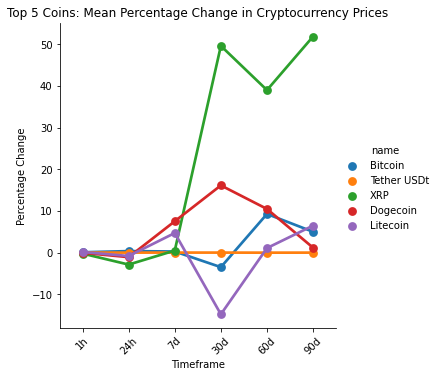

In [129]:
top_n_coins = 5
top_coins = df['name'].value_counts().nlargest(top_n_coins).index

df_filtered = df[df['name'].isin(top_coins)]

# Calculate the mean percentage change for the filtered data
df3_filtered = df_filtered.groupby('name', sort=False)[['quote.USD.percent_change_1h',
                                                        'quote.USD.percent_change_24h',
                                                        'quote.USD.percent_change_7d',
                                                        'quote.USD.percent_change_30d',
                                                        'quote.USD.percent_change_60d',
                                                        'quote.USD.percent_change_90d']].mean()

df4_filtered = df3_filtered.stack().to_frame(name='values').reset_index().rename(columns={'level_1': 'percent_change'})

# Create a catplot for visualizing percentage changes for the top N coins
plt.figure(figsize=(12, 6))
sns.catplot(x='percent_change', y='values', hue='name', data=df4_filtered, kind='point')
plt.title(f'Top {top_n_coins} Coins: Mean Percentage Change in Cryptocurrency Prices')
plt.xlabel('Timeframe')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)

# Customize the x-axis tick labels
x_ticks_labels = ['1h', '24h', '7d', '30d', '60d', '90d']
plt.gca().set_xticklabels(x_ticks_labels)

plt.show()

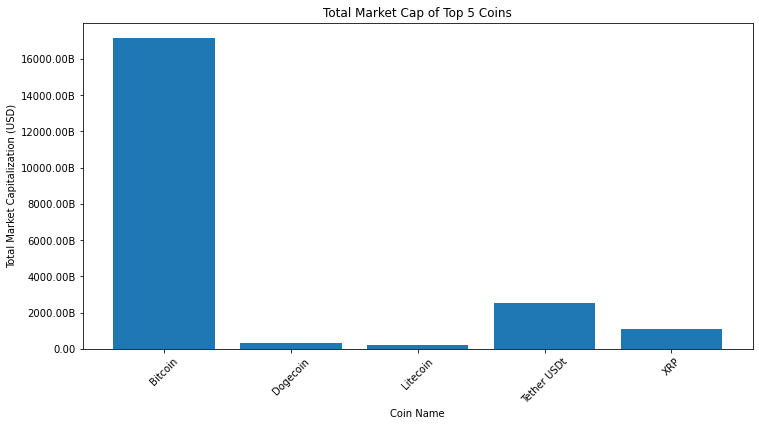

In [130]:
#Total market cap for each of the top 5 coins
top_5_coins_market_cap = df_filtered.groupby('name')['quote.USD.market_cap'].sum()

plt.figure(figsize=(12, 6))
plt.bar(top_5_coins_market_cap.index, top_5_coins_market_cap.values)
plt.xlabel('Coin Name')
plt.ylabel('Total Market Capitalization (USD)')
plt.title('Total Market Cap of Top 5 Coins')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter_volume_trend))
plt.show()


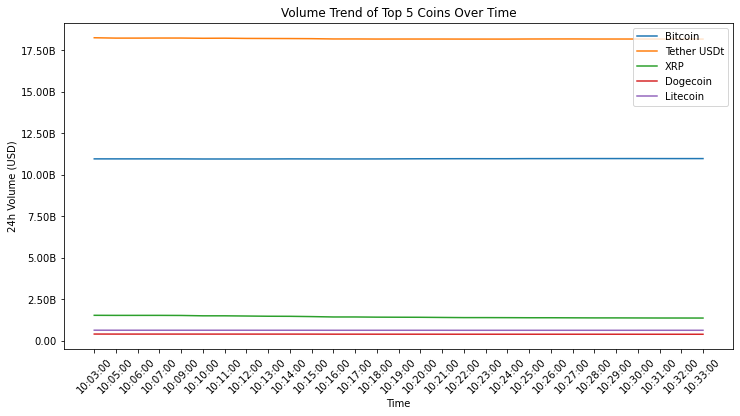

In [147]:
plt.figure(figsize=(12, 6))

for coin in top_coins:
    coin_data = df[df['name'] == coin].copy()
    coin_data['timestamp'] = pd.to_datetime(coin_data['last_updated'])
    coin_data['time'] = coin_data['timestamp'].dt.strftime('%H:%M:%S')
    plt.plot(coin_data['time'], coin_data['quote.USD.volume_24h'], label=coin)

plt.xlabel('Time')
plt.ylabel('24h Volume (USD)')
plt.title('Volume Trend of Top 5 Coins Over Time')
plt.xticks(rotation=45)
plt.legend()

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter_volume_trend))

plt.show()

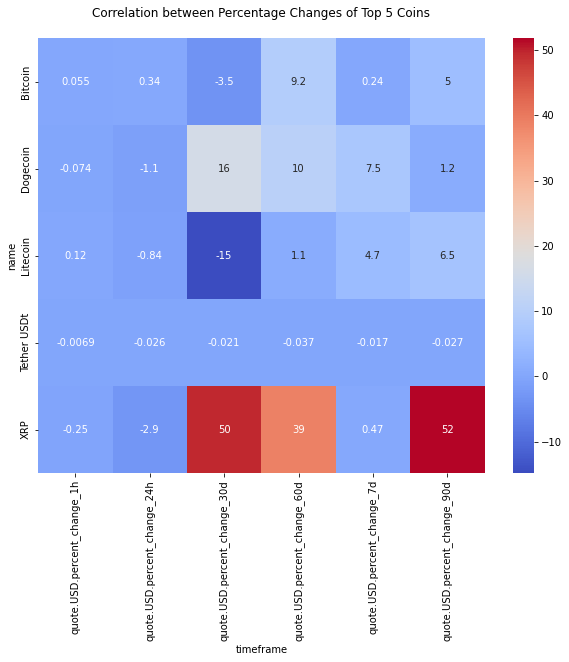

In [78]:
# Calculate the mean percentage change for the filtered data
df3_filtered = df_filtered.groupby('name', sort=False)[['quote.USD.percent_change_1h',
                                                        'quote.USD.percent_change_24h',
                                                        'quote.USD.percent_change_7d',
                                                        'quote.USD.percent_change_30d',
                                                        'quote.USD.percent_change_60d',
                                                        'quote.USD.percent_change_90d']].mean()

# Filter and pivot the dataframe to have columns as timeframes and rows as coins
df4_filtered = df3_filtered.stack().to_frame(name='values').reset_index().rename(columns={'level_1': 'timeframe'})


df4_filtered_pivot = df4_filtered.pivot(index='name', columns='timeframe', values='values')

plt.figure(figsize=(10, 8))
sns.heatmap(df4_filtered_pivot, annot=True, cmap='coolwarm')
plt.title('Correlation between Percentage Changes of Top 5 Coins\n')
plt.show()


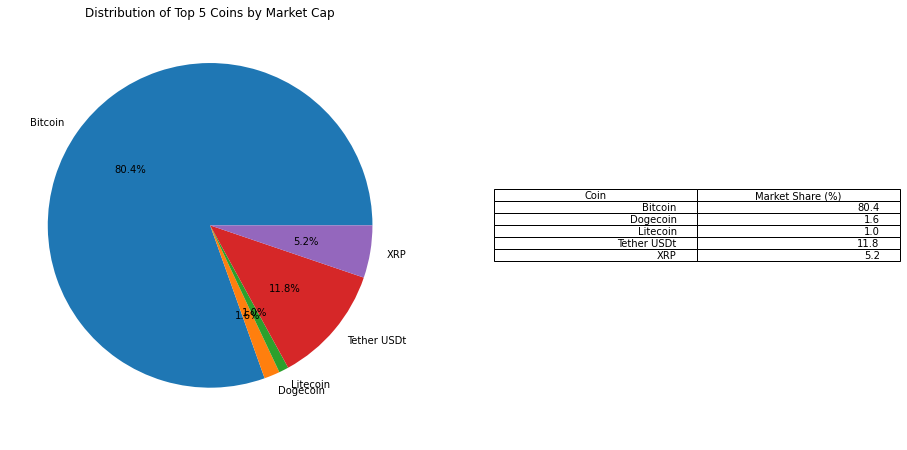

In [91]:
# Total market cap of the top 5 coins
total_market_cap = top_5_coins_market_cap.sum()

# Market share percentages
market_share_percentages = (top_5_coins_market_cap / total_market_cap) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart in the first subplot (ax1)
ax1.pie(top_5_coins_market_cap, labels=top_5_coins_market_cap.index, autopct='%1.1f%%')
ax1.set_title('Distribution of Top 5 Coins by Market Cap')

# Create a table with the market share percentages in the second subplot (ax2)
table_data = [[coin, f"{percentage:.1f}"] for coin, percentage in zip(top_5_coins_market_cap.index, market_share_percentages)]
ax2.axis('off')
ax2.table(cellText=table_data, colLabels=['Coin', 'Market Share (%)'], loc='center')


plt.show()

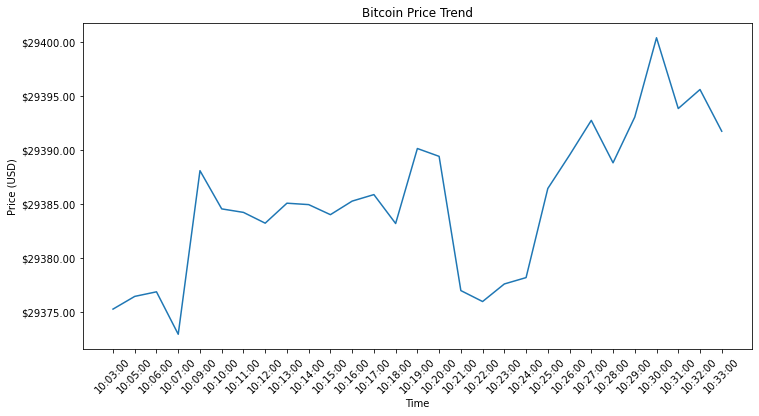

In [81]:
# Data analysis and visualization for Bitcoin (BTC) price trend
bitcoin_data = df[df['symbol'] == 'BTC'].copy()

# print(bitcoin_data.head())

# Convert last updated column to datetime
bitcoin_data['timestamp'] = pd.to_datetime(bitcoin_data['last_updated'])

# Extract only the time part from the timestamp as a string
bitcoin_data['time'] = bitcoin_data['timestamp'].dt.strftime('%H:%M:%S')

# Line plot of Bitcoin prices over time
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['time'], bitcoin_data['quote.USD.price'])
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Trend')
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter_btc))

plt.show()



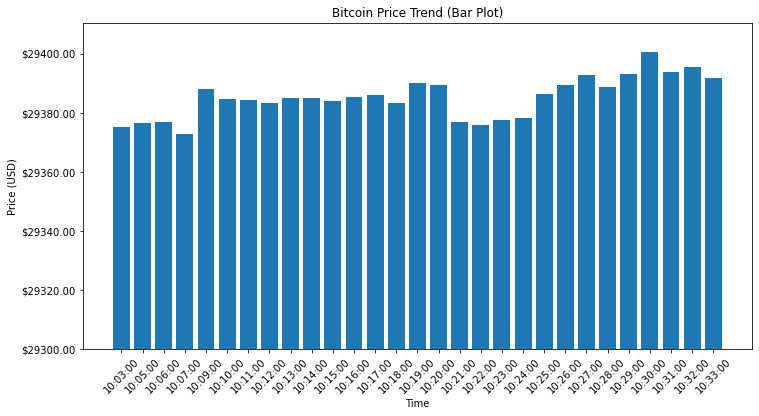

In [89]:
# Convert last updated column to datetime
bitcoin_data['timestamp'] = pd.to_datetime(bitcoin_data['last_updated'])

# Sort the df by timestamp
bitcoin_data.sort_values('timestamp', inplace=True)

# Extract only the time part from the timestamp as a string
bitcoin_data['time'] = bitcoin_data['timestamp'].dt.strftime('%H:%M:%S')

plt.figure(figsize=(12, 6))
plt.bar(bitcoin_data['time'], bitcoin_data['quote.USD.price'])
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Trend (Bar Plot)')
plt.xticks(rotation=45)

# Lower limit for the y-axis
plt.ylim(29300, max(bitcoin_data['quote.USD.price']) + 10)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter_btc))

plt.show()

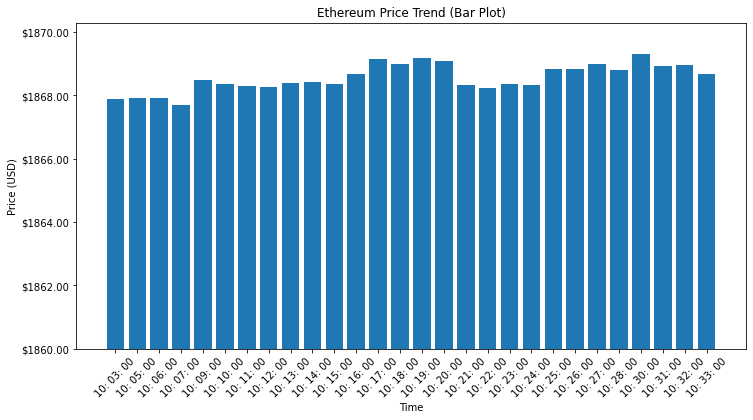

In [88]:
eth_data = df[df['symbol'] == 'ETH'].copy()
eth_data['timestamp'] = pd.to_datetime(eth_data['last_updated'])
eth_data['time'] = eth_data['timestamp'].dt.strftime('%H: %M: %S')

plt.figure(figsize = (12, 6))
plt.bar(eth_data['time'], eth_data['quote.USD.price'])
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.title('Ethereum Price Trend (Bar Plot)')
plt.xticks(rotation = 45)

plt.ylim(1860, max(eth_data['quote.USD.price']) + 1)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter_btc))

plt.show()

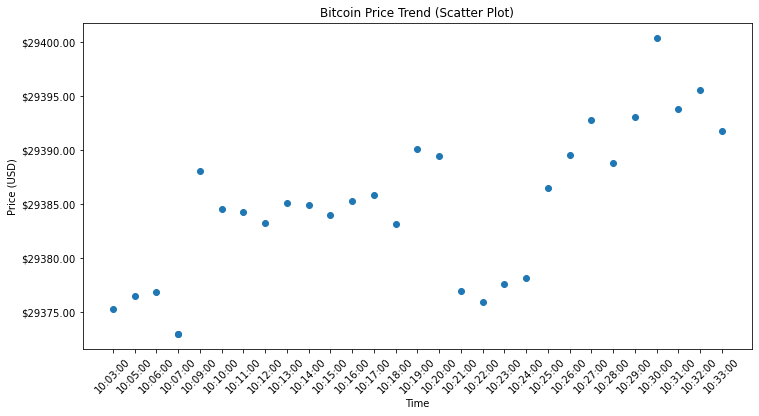

In [87]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Convert 'last_updated' column to datetime
bitcoin_data['timestamp'] = pd.to_datetime(bitcoin_data['last_updated'])

# Extract only the time part from the timestamp as a string
bitcoin_data['time'] = bitcoin_data['timestamp'].dt.strftime('%H:%M:%S')

plt.figure(figsize=(12, 6))
plt.scatter(bitcoin_data['time'], bitcoin_data['quote.USD.price'])
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Trend (Scatter Plot)')
plt.xticks(rotation=45)


plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter_btc))

plt.show()



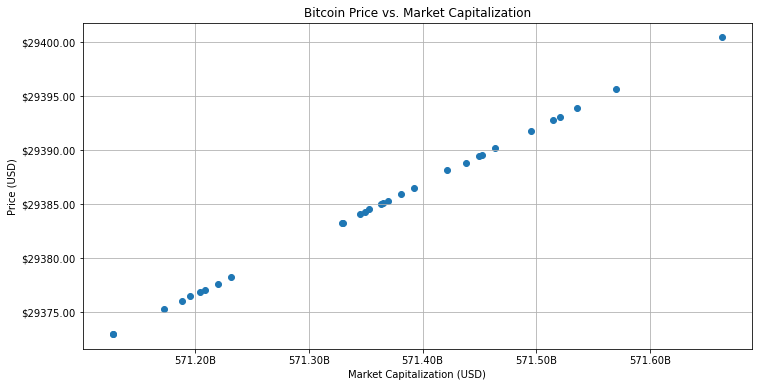

In [86]:
# Scatter plot of Price vs. Market Cap
plt.figure(figsize=(12, 6))
plt.scatter(bitcoin_data['quote.USD.market_cap'], bitcoin_data['quote.USD.price'])
plt.xlabel('Market Capitalization (USD)')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price vs. Market Capitalization')
plt.grid(True)

#Price formatting
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(price_formatter_volume_trend))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(price_formatter_btc))

plt.show()
